## choose disease based on pathway notations
While a higher number of associated pathways in KEGG typically suggests that a disease is better understood, then the features generated from PPI might be easier to predict diease genes.

In [1]:
import pandas as pd

# Define the file path
file_path = 'data/ICD/icd102019syst_codes.txt'  # Replace with your actual file path

# Read the file into a DataFrame
df = pd.read_csv(file_path, delimiter=';', header=None)

In [2]:
filtered_df = df[df[6].str.len() == 3]
filtered_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3,N,X,1,A00,A00.-,A00,A00,Cholera,Cholera,NaN,NaN,001,4-002,3-003,2-001,1-002
4,3,N,X,1,A00,A01.-,A01,A01,Typhoid and paratyphoid fevers,Typhoid and paratyphoid fevers,NaN,NaN,002,4-002,3-003,2-003,1-004
10,3,N,X,1,A00,A02.-,A02,A02,Other salmonella infections,Other salmonella infections,NaN,NaN,006,4-002,3-003,2-003,1-004
16,3,N,X,1,A00,A03.-,A03,A03,Shigellosis,Shigellosis,NaN,NaN,003,4-002,3-003,2-003,1-004
23,3,N,X,1,A00,A04.-,A04,A04,Other bacterial intestinal infections,Other bacterial intestinal infections,NaN,NaN,006,4-002,3-003,2-003,1-004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,3,N,X,22,U00,U09.-,U09,U09,Post COVID-19 condition,Post COVID-19 condition,NaN,NaN,UNDEF,UNDEF,UNDEF,UNDEF,UNDEF
12199,3,N,X,22,U82,U82.-,U82,U82,Resistance to betalactam antibiotics,Resistance to betalactam antibiotics,NaN,NaN,UNDEF,UNDEF,UNDEF,UNDEF,UNDEF
12205,3,N,X,22,U82,U83.-,U83,U83,Resistance to other antibiotics,Resistance to other antibiotics,NaN,NaN,UNDEF,UNDEF,UNDEF,UNDEF,UNDEF
12212,3,N,X,22,U82,U84.-,U84,U84,Resistance to other antimicrobial drugs,Resistance to other antimicrobial drugs,NaN,NaN,UNDEF,UNDEF,UNDEF,UNDEF,UNDEF


In [3]:
disease_df_info = filtered_df.iloc[:, [7, 8]]
disease_df_info = disease_df_info.rename(columns={disease_df_info.columns[0]: 'icd', disease_df_info.columns[1]: 'disease'})
disease_df_info

,icd,disease
0,A00,Cholera
4,A01,Typhoid and paratyphoid fevers
10,A02,Other salmonella infections
16,A03,Shigellosis
23,A04,Other bacterial intestinal infections
...,...,...
12197,U09,Post COVID-19 condition
12199,U82,Resistance to betalactam antibiotics
12205,U83,Resistance to other antibiotics
12212,U84,Resistance to other antimicrobial drugs


### delete disease with unknown machanisms

In [4]:
# Define a pattern that includes all the substrings to exclude
pattern = 'unknown|other|not specified|not confirmed|unspecified'

# Filter the DataFrame using the pattern
disease_df_info = disease_df_info[~disease_df_info['disease'].str.contains(pattern, case=False, na=False)]
disease_df_info = disease_df_info[~disease_df_info['icd'].str.contains(r'[O-Z]', case=False, na=False)]
disease_df_info

,icd,disease
0,A00,Cholera
4,A01,Typhoid and paratyphoid fevers
16,A03,Shigellosis
42,A06,Amoebiasis
70,A15,"Respiratory tuberculosis, bacteriologically an..."
...,...,...
6419,N92,"Excessive, frequent and irregular menstruation"
6448,N96,Habitual aborter
6449,N97,Female infertility
6457,N98,Complications associated with artificial ferti...


In [ ]:
# # List of ICD ranges
# icd_ranges = [
#     "A50-A64", "A65-A69", "A70-A74", "A80-A89", "A92-A99", "B35-B49", "B50-B64", "B65-B83", 
#     "B85-B89", "B90-B94", "C40-C41", "C76-C80", "D50-D53", "D65-D69", "D80-D89", "F10-F19", 
#     "F50-F59", "F60-F69", "G10-G14", "G70-G73", "G80-G83", "H00-H06", "H25-H28", "I95-I99", 
#     "J60-J70", "K65-K67", "K80-K87", "L55-L59", "M60-M63", "M65-M68", "N25-N29", "N40-N51", 
#     "N99-N99", "O10-O16", "P00-P04", "P10-P15", "P70-P74", "Q00-Q07", "Q20-Q28", "R00-R09", 
#     "S00-S09", "S10-S19", "S20-S29", "T00-T07", "U00-U49"
# ]

# def get_middle_values(icd_list):
#     icds = []
#     start, end = icd_list
#     start_num = int(start[1:])
#     end_num = int(end[1:])
    
#     for i in range(start_num, end_num+1):
#         icds.append(start[0]+str(i))
#     return icds

# delete_icds = []
# for group in icd_ranges:
#     items = get_middle_values(group.split('-'))
#     delete_icds.extend(items)
# disease_df_info = disease_df_info[~disease_df_info['icd'].isin(delete_icds)]
# disease_df_info

In [5]:
disease_df_info.to_csv('data/filtered_icd_withoutpub.csv',index=False)
# Transform the 'icd' column to the desired format
disease_df_info['formatted_icd'] = disease_df_info['icd'] + '-' + disease_df_info['icd'].str[1:]
# Write to a text file with one string per line
disease_df_info['formatted_icd'].to_csv('data/filtered_icd_list_withoutpub.txt', index=False, header=False)

### check disease researches

In [6]:
import requests
def check_disease_pathways(disease):
    query = f"pathway AND mechanism AND {disease}"
        
    # PubMed URL to get the total number of results
    search_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={query}&retmode=json&sort=pub+date"
    try:
        # Fetch search results to get the total count
        response = requests.get(search_url)
        response.raise_for_status()
        total_results = int(response.json().get("esearchresult", {}).get("count", 0))

        if total_results == 0:
            print("No results found for the given query.")
            return None
        return total_results
    except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            return None

In [ ]:
disease_df_info['pathways_pub'] = disease_df_info['disease'].apply(check_disease_pathways)
disease_df_info

In [8]:
disease_df_info.to_csv('data/disease_mache.csv')

#### read disaese_pathway file


In [ ]:
import pandas as pd
disease_df_info = pd.read_csv('data/disease_mache.csv')
len(disease_df_info)

In [ ]:
disease_df_info_cleaned = disease_df_info.dropna(subset=['pathways_pub'])
len(disease_df_info_cleaned)

In [ ]:
disease_df_info_cleaned['pathways_pub'].mean(),disease_df_info_cleaned['pathways_pub'].median()

In [ ]:
disease_df_info_cleaned['pathways_pub'].max(),disease_df_info_cleaned['pathways_pub'].min()

In [ ]:
# Sort the DataFrame by the 'pathways_rank' column
disease_df_info_cleaned = disease_df_info_cleaned.sort_values(by='pathways_pub',ascending=False)
disease_df_info_cleaned


In [ ]:
disease_df_info_cleaned.head(50) 

In [ ]:
disease_df_info_cleaned = disease_df_info_cleaned.iloc[7:]
disease_df_info_cleaned.head(50)

In [ ]:
len(disease_df_info_cleaned)

In [ ]:
percentage = 1
tops = disease_df_info_cleaned.head(int(percentage*len(disease_df_info_cleaned)))
tops['pathways_pub'].max(),tops['pathways_pub'].min()

In [19]:
tops.to_csv('data/tpos_disease_pathway.csv',index=False)

In [ ]:

# Transform the 'icd' column to the desired format
tops['formatted_icd'] = tops['icd'] + '-' + tops['icd'].str[1:]
# Write to a text file with one string per line
tops['formatted_icd'].to_csv('data/filtered_icd_list.txt', index=False, header=False)


### query KEGG for disease (need common disease name instead of icd names)

In [ ]:
from bioservices import KEGG

def query_kegg(disease):
    """Query KEGG for pathways related to a disease."""
    kegg = KEGG()
    results = kegg.find("disease", disease)
    if results:
        # Count number of pathways directly without creating a list of entries
        return results.strip().count("\n")  # counts the number of pathways
    else:
        return "No pathways found in KEGG for the specified disease."

# Example usage
disease_query = "breast cancer"
print("KEGG Pathways:", query_kegg(disease_query))


## get disease genes from DisGeNET

In [2]:
import requests
import json
import time
import math
from typing import Dict, List, Any
import os

In [15]:
# DisgenetClient class is responsible for creating a postprocessed csv file with the data obtained from the DisGeNET API.
class DisgenetClient:
    def __init__(self, api_key: str):
        self.api_key = api_key
        self.api_calls = 0
        self.total_results = 0
        self.disease_count = 0
        self.gene_count = 0
        # self.disease_file_path = "/itf-fi-ml/shared/users/ziyuzh/svm/data/dga_test_icd.txt"
        self.disease_file_path = "/itf-fi-ml/shared/users/ziyuzh/svm/data/filtered_icd_list_withoutpub.txt"
        self.data_file_path = "/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/disgenet_all_annotation.csv"
        self.disgenet_base_url = "https://api.disgenet.com"
        self.disgenet_dga_route = "/api/v1/gda/summary"

    def create_csv_file(self) -> None:
        print("[INFO] Starting data creation process. This may take a few minutes...")

        start_time = time.time()
        if os.path.exists(self.data_file_path):
            os.remove(self.data_file_path)
            print(f"{self.data_file_path} has been deleted.")
            
        self.write_to_csv_file(["disease_id;omim;hpo;do;disease_name;gene_id;entrz;esembl;uniport;score;first_pub_year;last_pub_year;ei;dsi;dpi"])

        disease_categories: List[str] = self.get_disease_categories()
        for disease_category in disease_categories:
            results: List[str] = []
            params: Dict = {"disease": self.get_disease_param(disease_category)}

            response = self.send_request(params, self.disgenet_dga_route)
            self.process_response(response, results)
            pages_left = math.ceil(response["paging"]["totalElements"] / 100) - 1

            for page in range(1, pages_left + 1):
                params["page_number"] = page
                response = self.send_request(params, self.disgenet_dga_route)
                self.process_response(response, results)

        self.postprocess_csv_file()
        end_time = time.time()
        self.csv_log(start_time, end_time)
        return

    def send_request(self, params: Dict, route: str) -> Any:
        self.api_calls += 1
        headers: Dict = {"Authorization": self.api_key, "accept": "application/json"}
        response = requests.get(
            url=self.disgenet_base_url + route, params=params, headers=headers
        )
        response = self.handle_api_rate_limit(response, params, route)
        return json.loads(response.text)

    def process_response(self, response: Dict, results: List[str]) -> None:

        for association in response["payload"]:
            disease_id = None
            omim_id = []
            hpo_id = []
            do_id = []
            for id in association["diseaseVocabularies"]:
                if id.startswith("ICD10_") and len(id) == 9:
                    disease_id = id
                elif id.startswith("OMIM_"):
                    omim_id.append(id)
                elif id.startswith("HPO_"):
                    hpo_id.append(id)
                elif id.startswith("DO_"):
                    do_id.append(id)

            
            ei = round(association["ei"], 3) if association["ei"] is not None else 0
            dsi = (
                association["geneDSI"] if association["geneDSI"] is not None else 0.230
            )
            dpi = association["geneDPI"] if association["geneDPI"] is not None else 0

            results.append(
                f"{disease_id};{omim_id};{hpo_id};{do_id};{association['diseaseName']};{association['symbolOfGene']};{association['geneNcbiID']};{association['geneEnsemblIDs']};{association['geneProteinStrIDs']};{association['score']};{association['yearInitial']};{association['yearFinal']};{ei};{dsi};{dpi}"
            )
        self.write_to_csv_file(results)
        results.clear()
        return

    # Handle the API rate limit by waiting for the specified time and then retrying the request
    def handle_api_rate_limit(self, response: Dict, params: Dict, route: str) -> Any:
        if response.status_code == 429:
            while response.status_code == 429:
                wait_time = (
                    int(response.headers["x-rate-limit-retry-after-seconds"]) + 1
                )
                print(f"[INFO] Waiting {wait_time} seconds to restore rate limit")
                time.sleep(wait_time)

                self.api_calls += 1
                # The API key is for auth, can be obtained from disgenet personal site
                headers: Dict = {
                    "Authorization": self.api_key,
                    "accept": "application/json",
                }
                response = requests.get(
                    url=self.disgenet_base_url + route, params=params, headers=headers
                )

                if response.ok:
                    break
                else:
                    continue
        return response

    def write_to_csv_file(self, data: List[str]) -> None:
        with open(self.data_file_path, "a") as file:
            for line in data:
                file.write(line + "\n")
        return

    def postprocess_csv_file(self) -> None:
        with open(self.data_file_path, "r") as file:
            lines = file.readlines()

        header: str = lines[0]
        rows: List[str] = lines[1:]

        sorted_rows: List[str] = sorted(
            rows, key=lambda line: line.strip().split(";")[0]
        )
        self.total_results = len(sorted_rows)

        self.disease_count = len({line.strip().split(";")[0] for line in sorted_rows})
        self.gene_count = len({line.strip().split(";")[1] for line in sorted_rows})

        with open(self.data_file_path, "w") as file:
            file.write(header)
            file.writelines(sorted_rows)
        return

    # Get disease parameter from ICD code (https://icd.who.int/browse10/2019/en)
    def get_disease_param(self, disease_ids: str) -> str:
        category: str = disease_ids[0]
        disease_range: str = disease_ids[1:]
        start: int = int(disease_range.split("-")[0])
        end: int = int(disease_range.split("-")[1])

        disease_param: str = ""
        for i in range(start, end + 1):
            index: str = str(i) if i >= 10 else "0" + str(i)
            disease_param += "ICD10_" + category + index
            if i != end:
                disease_param += ";"
        return disease_param

    def get_disease_categories(self) -> List[str]:
        with open(self.disease_file_path, "r") as file:
            categories = file.readlines()
        return categories

    def csv_log(self, start_time, end_time) -> None:
        elapsed_time = end_time - start_time
        minutes = int(elapsed_time // 60)
        seconds = int(elapsed_time % 60)

        print(
            f"[INFO] Data file created with {self.disease_count} diseases, {self.gene_count} genes and {self.total_results} associations."
        )
        if minutes > 0:
            print(
                f"[INFO] Completed in {minutes} minutes and {seconds} seconds using {self.api_calls} api calls."
            )
        else:
            print(
                f"[INFO] Completed in {seconds} seconds using {self.api_calls} api calls."
            )

In [16]:
disgenet_api_key = "567b3cda-b397-49cb-8763-9c9fae28ac47" 
disgenet_client = DisgenetClient(disgenet_api_key)
disgenet_client.create_csv_file()

[INFO] Starting data creation process. This may take a few minutes...
[INFO] Waiting 36 seconds to restore rate limit
[INFO] Waiting 35 seconds to restore rate limit
[INFO] Waiting 3 seconds to restore rate limit
[INFO] Waiting 10 seconds to restore rate limit
[INFO] Waiting 35 seconds to restore rate limit
[INFO] Waiting 37 seconds to restore rate limit
[INFO] Waiting 34 seconds to restore rate limit
[INFO] Waiting 35 seconds to restore rate limit
[INFO] Waiting 37 seconds to restore rate limit
[INFO] Waiting 36 seconds to restore rate limit
[INFO] Waiting 36 seconds to restore rate limit
[INFO] Waiting 37 seconds to restore rate limit
[INFO] Waiting 36 seconds to restore rate limit
[INFO] Waiting 37 seconds to restore rate limit
[INFO] Waiting 36 seconds to restore rate limit
[INFO] Data file created with 223 diseases, 39 genes and 8737 associations.
[INFO] Completed in 15 minutes and 19 seconds using 798 api calls.


In [20]:
import pandas as pd
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/disgenet_all_annotation.csv',sep=';')
all_df.head(3)

,disease_id,omim,hpo,do,disease_name,gene_id,entrz,esembl,uniport,score,first_pub_year,last_pub_year,ei,dsi,dpi
0,ICD10_A23,[],[],['DO_11077'],Brucelloses,CXCL8,3576,['ENSG00000169429'],['P10145'],0.60,NaN,NaN,1.000,0.290,0.957
1,ICD10_A23,[],[],['DO_11077'],Brucelloses,NPC1,4864,['ENSG00000141458'],['O15118'],0.40,2002.0,2002.0,1.000,0.527,0.913
2,ICD10_A30,[],[],['DO_1024'],Leprosy,SLC11A1,6556,['ENSG00000018280'],['P49279'],0.85,2006.0,2006.0,0.857,0.469,0.913


In [22]:
disease_df = all_df[['disease_id', 'omim', 'hpo', 'do', 'disease_name']]
gene_df = all_df[['gene_id', 'entrz','esembl', 'uniport']]

In [25]:
disease_df = disease_df.drop_duplicates()
gene_df = gene_df.drop_duplicates()

In [26]:
len(disease_df),len(gene_df)

(223, 5381)

In [28]:
len(disease_df[disease_df['omim']=='[]']), len(disease_df[disease_df['hpo']=='[]']), len(disease_df[disease_df['do']=='[]'])

(184, 102, 28)

In [39]:
#### string gene_id map
local_stringdb = os.path.join('/itf-fi-ml/shared/users/ziyuzh/svm/data/stringdb','2023')

ppidf = pd.read_csv(os.path.join(local_stringdb,'9606.protein.info.v12.0.txt'), sep='\t', header=0, usecols=['#string_protein_id', 'preferred_name'])
ppidf['preferred_name'] = ppidf['preferred_name'].str.upper()
stringId2name = ppidf.set_index('#string_protein_id')['preferred_name'].to_dict()
name2stringId = ppidf.set_index('preferred_name')['#string_protein_id'].to_dict()
ppidf = pd.read_csv(os.path.join(local_stringdb,'9606.protein.aliases.v12.0.txt'), sep='\t', header=0, usecols=['#string_protein_id', 'alias']).drop_duplicates(['alias'], keep='first')
ppidf['alias'] = ppidf['alias'].str.upper()
aliases2stringId = ppidf.set_index('alias')['#string_protein_id'].to_dict()

def string_convert(gene):
    if gene in name2stringId.keys():
        return name2stringId[gene]
    elif gene in aliases2stringId.keys():
        return aliases2stringId[gene]
    else:
        return None

In [40]:
gene_df['string_id'] = gene_df['gene_id'].map(string_convert)

In [42]:
len(gene_df[gene_df['esembl']=='[]']),len(gene_df[gene_df['uniport']=='[]']),len(gene_df[gene_df['string_id'].isna()])

(166, 338, 374)

In [46]:
all_df[all_df['gene_id']=='GSTT1']

,disease_id,omim,hpo,do,disease_name,gene_id,entrz,esembl,uniport,score,first_pub_year,last_pub_year,ei,dsi,dpi
47,ICD10_B27,[],[],['DO_8568'],Infectious Mononucleosis,GSTT1,2952,[],"['Q4W251', 'Q4GZS9', 'P30711', 'A0A0G2JRN4', '...",0.55,NaN,NaN,1.000,0.389,0.957
100,ICD10_C04,[],[],['DO_8618'],Malignant neoplasm of floor of mouth,GSTT1,2952,[],"['P30711', 'A0A0G2JRN4', 'A0A0G2JRQ5', 'Q4GZS9...",0.45,NaN,NaN,1.000,0.389,0.957
151,ICD10_C16,['OMIM_613659'],['HPO_HP:0012126'],['DO_10534'],Malignant neoplasm of stomach,GSTT1,2952,[],"['Q4W251', 'Q4GZS9', 'P30711', 'A0A0G2JRN4', '...",0.80,NaN,NaN,0.711,0.389,0.957
354,ICD10_C43,['OMIM_155600'],"['HPO_HP:0012056', 'HPO_HP:0002861']",['DO_8923'],Malignant melanoma of skin,GSTT1,2952,[],"['P30711', 'A0A0G2JRN4', 'A0A0G2JRQ5', 'Q4GZS9...",0.65,NaN,NaN,0.500,0.389,0.957
471,ICD10_C50,['OMIM_114480'],[],"['DO_1612', 'DO_3459']","Cancer, Breast",GSTT1,2952,[],"['P30711', 'Q4GZS9', 'A0A0G2JRN4', 'Q4W251', '...",0.90,NaN,NaN,0.743,0.389,0.957
1179,ICD10_C53,[],[],['DO_4362'],Malignant neoplasm of cervix uteri,GSTT1,2952,[],"['P30711', 'Q4GZS9', 'A0A0G2JRN4', 'Q4W251', '...",0.75,NaN,NaN,0.600,0.389,0.957
1410,ICD10_C61,"['OMIM_176807', 'OMIM_600020', 'OMIM_600185']",['HPO_HP:0012125'],['DO_10283'],Malignant neoplasm of prostate,GSTT1,2952,[],"['P30711', 'Q4W251', 'Q4GZS9', 'A0A0G2JRQ5', '...",0.80,NaN,NaN,0.706,0.389,0.957
2027,ICD10_C67,['OMIM_109800'],[],"['DO_4007', 'DO_11054']",Malignant neoplasm of bladder,GSTT1,2952,[],"['P30711', 'Q4GZS9', 'A0A0G2JRN4', 'Q4W251', '...",0.75,NaN,NaN,0.729,0.389,0.957
2228,ICD10_C81,"['OMIM_236000', 'OMIM_613169']",['HPO_HP:0012189'],"['DO_8543', 'DO_8567', 'DO_8628', 'DO_8654']",Hodgkin's granuloma,GSTT1,2952,[],"['Q4W251', 'Q4GZS9', 'P30711', 'A0A0G2JRN4', '...",0.60,NaN,NaN,0.667,0.389,0.957
2269,ICD10_C91,[],['HPO_HP:0005526'],"['DO_1037', 'DO_8692']",Lymphoid Leukemias,GSTT1,2952,[],"['Q4W251', 'Q4GZS9', 'P30711', 'A0A0G2JRN4', '...",0.45,NaN,NaN,1.000,0.389,0.957


In [45]:
gene_df[gene_df['string_id'].isna()]

,gene_id,entrz,esembl,uniport,string_id
47,GSTT1,2952,[],"['Q4W251', 'Q4GZS9', 'P30711', 'A0A0G2JRN4', '...",None
100,GSTT1,2952,[],"['P30711', 'A0A0G2JRN4', 'A0A0G2JRQ5', 'Q4GZS9...",None
107,MIR155,406947,['ENSG00000283904'],[],None
112,GPX1,2876,['ENSG00000233276'],"['P07203', 'Q7L4Q3', 'A0A2R8Y6B6']",None
118,MIR132,406921,['ENSG00000267200'],[],None
...,...,...,...,...,...
8456,ODAD2,55130,['ENSG00000169126'],"['A0A5F9ZH22', 'B7Z7Y0', 'A0A140VKF7', 'Q5T2S8...",None
8519,LOC126861667,126861667,[],[],None
8524,C1orf146,388649,['ENSG00000203910'],['Q5VVC0'],None
8528,LOC130056949,130056949,[],[],None


In [43]:
gene_df.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/disgenet_gene_annotations.csv',index = False)
disease_df.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/disgenet_disease_annotations.csv',index = False)

In [3]:
import pandas as pd
gene_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/disgenet_gene_annotations.csv')


In [6]:
gene_df['entrz'].to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/gene_id.txt',index = False)

### visualization of DisGeNET results

In [7]:
import pandas as pd
disease_gene = pd.read_csv('data/filtered_icd_list_withoutpub_ids.csv',sep=';')
disease_gene = disease_gene.rename(columns={'disease_id': 'icd'})
disease_gene['icd'].nunique(),disease_gene['gene_id'].nunique()


(223, 4544)

In [13]:
disease_gene.columns

Index(['icd', 'omim', 'hpo', 'disease_name', 'gene_id', 'score',
       'first_pub_year', 'last_pub_year', 'ei', 'dsi', 'dpi'],
      dtype='object')

In [14]:
disease_summary = disease_gene[['icd','omim', 'hpo','disease_name']]
disease_summary = disease_summary.drop_duplicates()
disease_summary

,icd,omim,hpo,disease_name
0,ICD10_A23,NaN,NaN,Brucelloses
2,ICD10_A30,NaN,NaN,Leprosy
15,ICD10_A32,NaN,NaN,Listeriosis
21,ICD10_A39,NaN,NaN,Meningococcal infection
24,ICD10_A71,NaN,NaN,Trachoma
...,...,...,...,...
8435,ICD10_N35,NaN,HPO_HP:0012227,urethra stricture
8437,ICD10_N41,NaN,HPO_HP:0000024,Prostatitides
8439,ICD10_N46,NaN,HPO_HP:0003251,"Infertility, Male"
8538,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses


In [15]:
# Define a function to count the gene numbers
def count_genes(id):
    return len(disease_gene[disease_gene['icd'] == id])

# Apply the function to the 'icd' column to create the 'gene_numbers' column
disease_summary['gene_numbers'] = disease_summary['icd'].apply(count_genes)
disease_summary.sort_values(by='gene_numbers')

,icd,omim,hpo,disease_name,gene_numbers
7456,ICD10_K90,NaN,NaN,Malabsorption syndrome,1
5968,ICD10_H71,NaN,NaN,Cholesteatoma of middle ear,1
5961,ICD10_H53,NaN,NaN,Visual disturbances,1
107,ICD10_C10,NaN,NaN,Malignant neoplasm of oropharynx,1
5900,ICD10_H10,NaN,HPO_HP:0000509,Conjunctivitides,1
...,...,...,...,...,...
2632,ICD10_E11,OMIM_189907,HPO_HP:0005978,Adult-Onset Diabetes Mellitus,328
4411,ICD10_F31,OMIM_611535,HPO_HP:0007302,Bipolar Disorders,483
1362,ICD10_C61,OMIM_600185,HPO_HP:0012125,Malignant neoplasm of prostate,619
433,ICD10_C50,OMIM_114480,NaN,"Cancer, Breast",736


In [10]:
disease_summary.to_csv('all_disease_with_genes.csv',index=False)

In [16]:
disease_summary = disease_summary[disease_summary['gene_numbers']>20]
disease_summary

,icd,omim,hpo,disease_name,gene_numbers
131,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,105
236,ICD10_C18,OMIM_191170,HPO_HP:0003003,Malignant neoplasm of colon,52
330,ICD10_C43,OMIM_155600,HPO_HP:0002861,Malignant melanoma of skin,56
386,ICD10_C45,NaN,NaN,Mesothelioma,43
433,ICD10_C50,OMIM_114480,NaN,"Cancer, Breast",736
...,...,...,...,...,...
8209,ICD10_N17,NaN,HPO_HP:0001919,"Kidney Failure, Acute",113
8322,ICD10_N18,NaN,NaN,"Kidney Failure, Chronic",103
8439,ICD10_N46,NaN,HPO_HP:0003251,"Infertility, Male",99
8538,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,166


In [17]:
disease_summary.to_csv('data/65_ids_summary.csv',index=False)

In [13]:
disease_summary['gene_numbers'].max(),disease_summary['gene_numbers'].min(),disease_summary['gene_numbers'].mean()

(973, 21, 120.73846153846154)

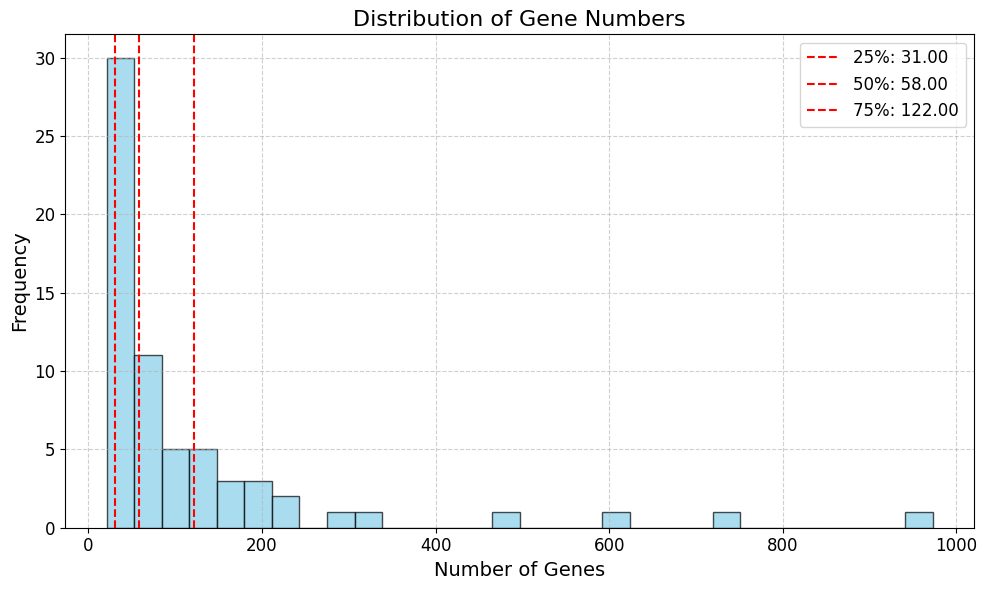

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 'gene_numbers' (replace with your actual data)
# disease_summary['gene_numbers'] should be a pandas Series or numpy array
gene_numbers = disease_summary['gene_numbers']

# Calculate percentiles
percentiles = np.percentile(gene_numbers, [25, 50, 75])

# Sample histogram for 'gene_numbers'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(gene_numbers, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for percentiles
for perc, label in zip(percentiles, ['25%', '50%', '75%']):
    plt.axvline(x=perc, color='red', linestyle='--', label=f'{label}: {perc:.2f}')

# Add legend
plt.legend(fontsize=12)

# Add title and labels
plt.title('Distribution of Gene Numbers', fontsize=16)  # Add a title
plt.xlabel('Number of Genes', fontsize=14)             # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)                   # Label for the y-axis

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()




## visulization of disease-gene data and disease-pathway data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
disease_pathway = pd.read_csv('data/tpos_disease_pathway.csv')
disease_pathway['icd'] = 'ICD10_'+disease_pathway['icd']
disease_gene = pd.read_csv('data/dga_data_test_single.csv',sep=';')

In [ ]:
disease_gene = disease_gene.rename(columns={'disease_id': 'icd'})
disease_gene.columns

In [ ]:
disease_gene.duplicated().sum(),disease_pathway.duplicated().sum()

In [ ]:
disease_gene['icd'].nunique(),disease_gene['gene_id'].nunique(),len(disease_pathway)

In [34]:
all_df = pd.merge(disease_gene,disease_pathway,on='icd',how='outer')

In [ ]:
len(all_df),len(disease_gene)

In [ ]:
all_df[all_df['disease_name'].isna()]

In [37]:
inner_df = pd.merge(disease_gene,disease_pathway,on='icd',how='inner')

In [ ]:
inner_df

In [ ]:
disease_summary = inner_df[['icd','disease_name','disease','pathways_pub']]
disease_summary = disease_summary.drop_duplicates()
disease_summary

In [ ]:
# Define a function to count the gene numbers
def count_genes(id):
    return len(inner_df[inner_df['icd'] == id])

# Apply the function to the 'icd' column to create the 'gene_numbers' column
disease_summary['gene_numbers'] = disease_summary['icd'].apply(count_genes)
disease_summary

In [ ]:
disease_summary.sort_values(by='gene_numbers')

In [ ]:
disease_summary = disease_summary[disease_summary['gene_numbers']>20]
disease_summary

In [ ]:
disease_summary['gene_numbers'].max(),disease_summary['gene_numbers'].min(),disease_summary['gene_numbers'].mean()

In [ ]:
disease_summary['pathways_pub'].max(),disease_summary['pathways_pub'].min(),disease_summary['pathways_pub'].mean()

In [ ]:
disease_summary[disease_summary['pathways_pub']==1]

In [ ]:
# Sample histogram for 'gene_numbers'
plt.figure(figsize=(10, 6))  # Set the figure size

plt.hist(disease_summary['gene_numbers'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Gene Numbers', fontsize=16)  # Add a title
plt.xlabel('Number of Genes', fontsize=14)             # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)                   # Label for the y-axis

plt.grid(True, linestyle='--', alpha=0.6)               # Add grid lines for better readability
plt.xticks(fontsize=12)                                # Set x-tick size
plt.yticks(fontsize=12)                                # Set y-tick size

plt.tight_layout()                                     # Adjust layout to prevent clipping
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Sample histogram for 'gene_numbers'
plt.figure(figsize=(10, 6))  # Set the figure size

plt.hist(disease_summary['pathways_pub'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of publication Numbers', fontsize=16)  # Add a title
plt.xlabel('Number of publications', fontsize=14)             # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)                   # Label for the y-axis

plt.grid(True, linestyle='--', alpha=0.6)               # Add grid lines for better readability
plt.xticks(fontsize=12)                                # Set x-tick size
plt.yticks(fontsize=12)                                # Set y-tick size

plt.tight_layout()                                     # Adjust layout to prevent clipping
plt.show()


## disease id map

In [ ]:
def send_request(self, params: Dict, route: str) -> Any:
    self.api_calls += 1
    headers: Dict = {"Authorization": self.api_key, "accept": "application/json"}
    response = requests.get(
        url=self.disgenet_base_url + route, params=params, headers=headers
    )
    response = self.handle_api_rate_limit(response, params, route)
    return json.loads(response.text)

def disease_id_map(disease_categories):
    for disease_category in disease_categories:
        results: List[str] = []
        params: Dict = {"disease": disease_category}

        response = send_request(params, "/api/v1/gda/summary")
        self.process_response(response, results)
        pages_left = math.ceil(response["paging"]["totalElements"] / 100) - 1

        for page in range(1, pages_left + 1):
            params["page_number"] = page
            response = send_request(params, "/api/v1/gda/summary")
            self.process_response(response, results)

disgenet_api_key = "567b3cda-b397-49cb-8763-9c9fae28ac47" 